<a href="https://colab.research.google.com/github/anujashende/telecom-data/blob/main/Telecom_Churn_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Project Objective** 

---


In this project, we will analyse customer data of a leading telecom company to identify the main indicators of churn and try to provide recommendations for better customer retention.

# **Importing Modules and Loading Data**


In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#insert the data file 
path='/content/drive/MyDrive/Capstone/Telecom Churn.csv'
df= pd.read_csv(path)

# **Understand more about The Data**

In [ ]:
#total rows and columns present in data set
print(df.shape)

(3333, 20)


In [ ]:
#information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

From the above analysis we can infer that there are 3333 entries and 20 columns

Further we can see that there are no null values .

In [ ]:
#view of the data of top five rows to look the glimpse of the data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#view of the data of bottom five rows to look the glimpse of the data
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#looking for the description of the dataset to get insights of the data
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


# **Basic Cleaning**

In [ ]:
#check for null values
df.isna().sum()
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


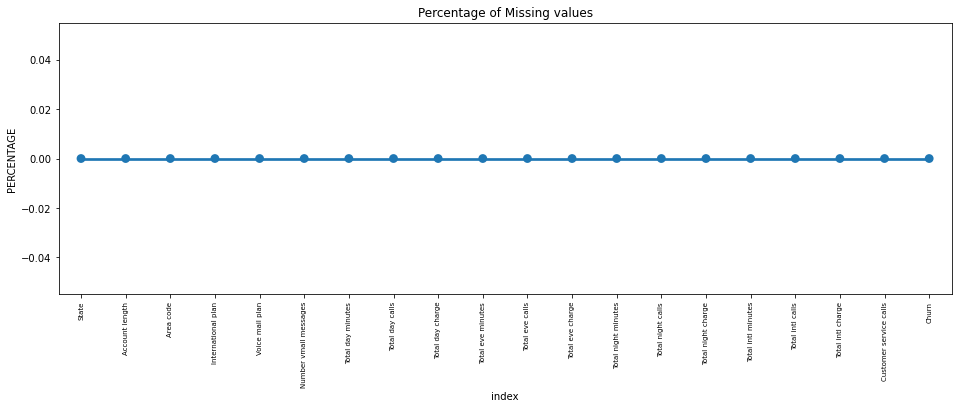

In [ ]:
#chart for missing values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#check for duplicate values
len(df[df.duplicated()])

0

In [ ]:
#check for unique values
print("\nUnique values:")
print(df.nunique())


Unique values:
State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


# **Univariate Analysis**

### Analyzing "Churn" column


In [ ]:
#check for the count of churn value
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


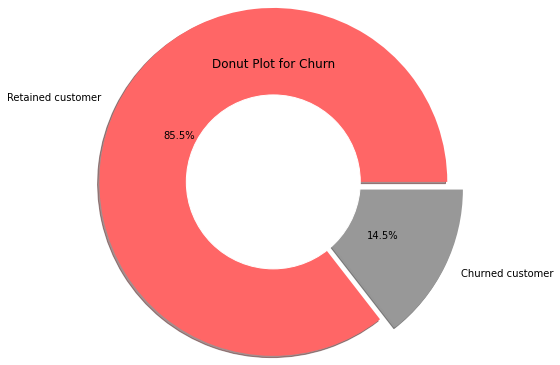

In [ ]:
#chart for churn
data = df['Churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Retained customer','Churned customer'],colors=['#ff6666' ,'#989898'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

### Analyzing "Account Length" column


In [ ]:
#check for account length insights
account_length = df['Account length']
account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account length, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Account Length Distribution')]

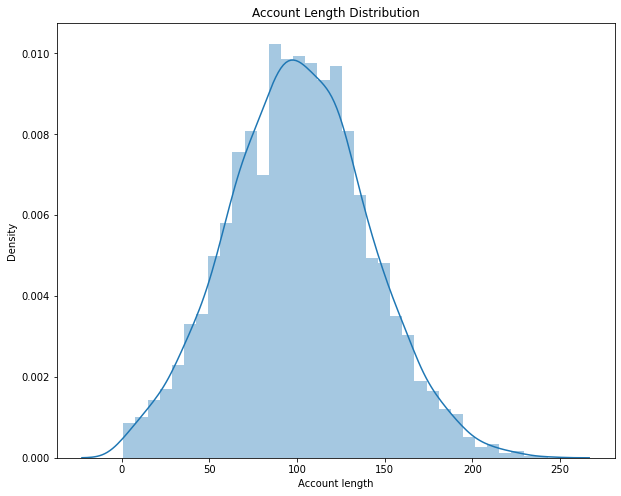

In [ ]:
#chart for account length
plt.rcParams['figure.figsize'] = (10,8)
sns.distplot(account_length, hist=True).set(title='Account Length Distribution')

### Analyzing "Customer Service Calls" column


In [ ]:
#check for the count of customer service calls value
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
#churn ratio to customer service calls
pd.crosstab(df['Customer service calls'], df['Churn'])

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


In [ ]:
#view of the data of churn rate in proportion to customer service calls
df.groupby(['Customer service calls'])['Churn'].mean().head(10)

Customer service calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: Churn, dtype: float64

In [ ]:
#check for customer service calls insights
customer_service_calls = df['Customer service calls']
customer_service_calls.describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Customer service calls, dtype: float64

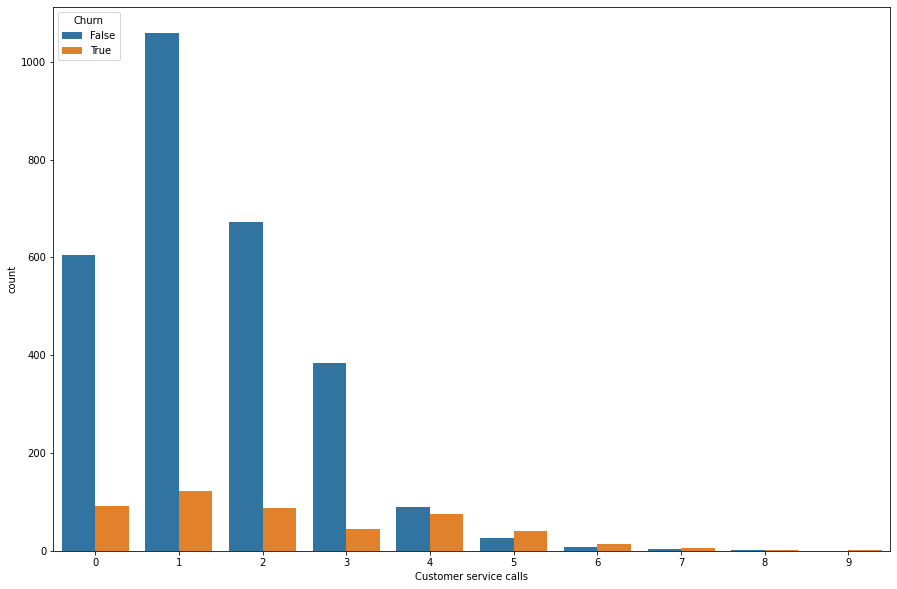

In [ ]:
#graph for customer service calls
plt.rcParams['figure.figsize'] = (15, 10)
ax = sns.countplot(x ='Customer service calls', hue = 'Churn', data = df);

### Analyzing "International Plan" column


In [ ]:
#check for international plan 
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
#churn ratio to international plan
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


In [ ]:
#ratio of churn with respect to international plan values
df.groupby(['International plan'])['Churn'].mean()

International plan
No     0.114950
Yes    0.424149
Name: Churn, dtype: float64

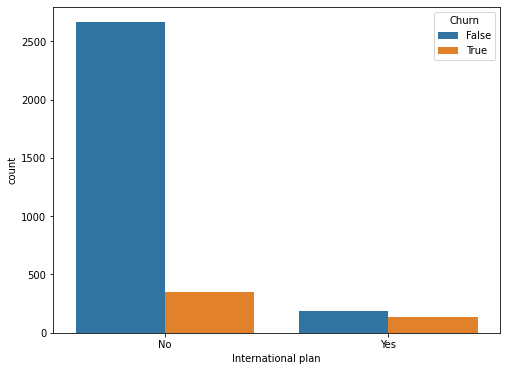

In [ ]:
#graph for customer service calls
plt.rcParams['figure.figsize'] = (8, 6)
ax = sns.countplot(x ='International plan', hue = 'Churn', data = df);

### Analyzing "State" column


In [ ]:
#check for state 
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [ ]:
#churn ratio to state
States = pd.crosstab(df['State'], df["Churn"])
print(States)

Churn  False  True
State             
AK        49     3
AL        72     8
AR        44    11
AZ        60     4
CA        25     9
CO        57     9
CT        62    12
DC        49     5
DE        52     9
FL        55     8
GA        46     8
HI        50     3
IA        41     3
ID        64     9
IL        53     5
IN        62     9
KS        57    13
KY        51     8
LA        47     4
MA        54    11
MD        53    17
ME        49    13
MI        57    16
MN        69    15
MO        56     7
MS        51    14
MT        54    14
NC        57    11
ND        56     6
NE        56     5
NH        47     9
NJ        50    18
NM        56     6
NV        52    14
NY        68    15
OH        68    10
OK        52     9
OR        67    11
PA        37     8
RI        59     6
SC        46    14
SD        52     8
TN        48     5
TX        54    18
UT        62    10
VA        72     5
VT        65     8
WA        52    14
WI        71     7
WV        96    10
WY        68

In [ ]:
#view of the data of top five retention states
df.groupby(['State'])['Churn'].mean().sort_values(ascending = True).head()

State
HI    0.056604
AK    0.057692
AZ    0.062500
VA    0.064935
IA    0.068182
Name: Churn, dtype: float64

In [ ]:
#view of the data of top five churning states
df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head()

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
Name: Churn, dtype: float64

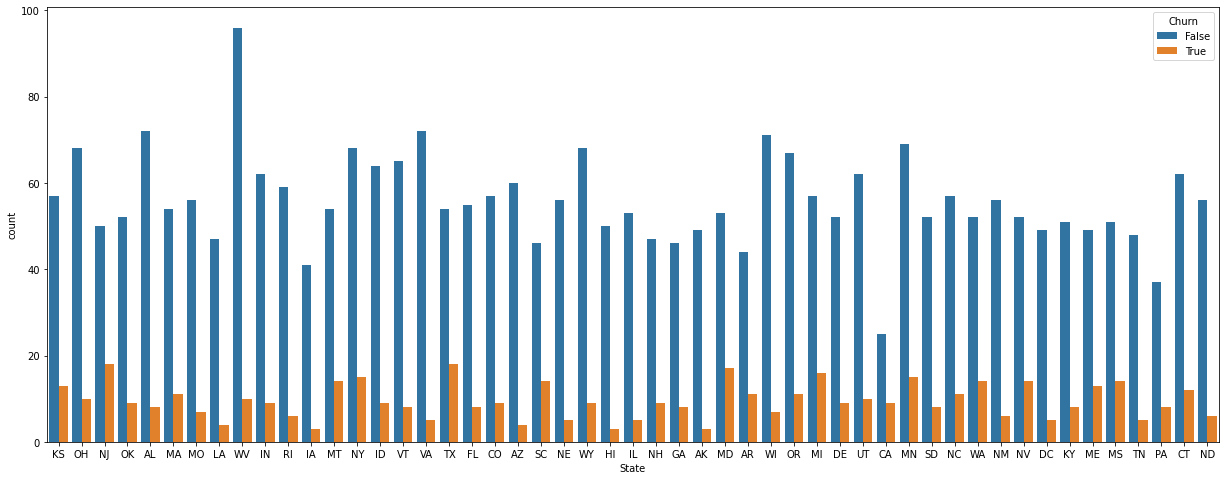

In [ ]:
#graph for customer service calls
plt.rcParams['figure.figsize'] = (21, 8)
ax = sns.countplot(x ='State', hue = 'Churn', data = df);

# **Multivariate Analysis**

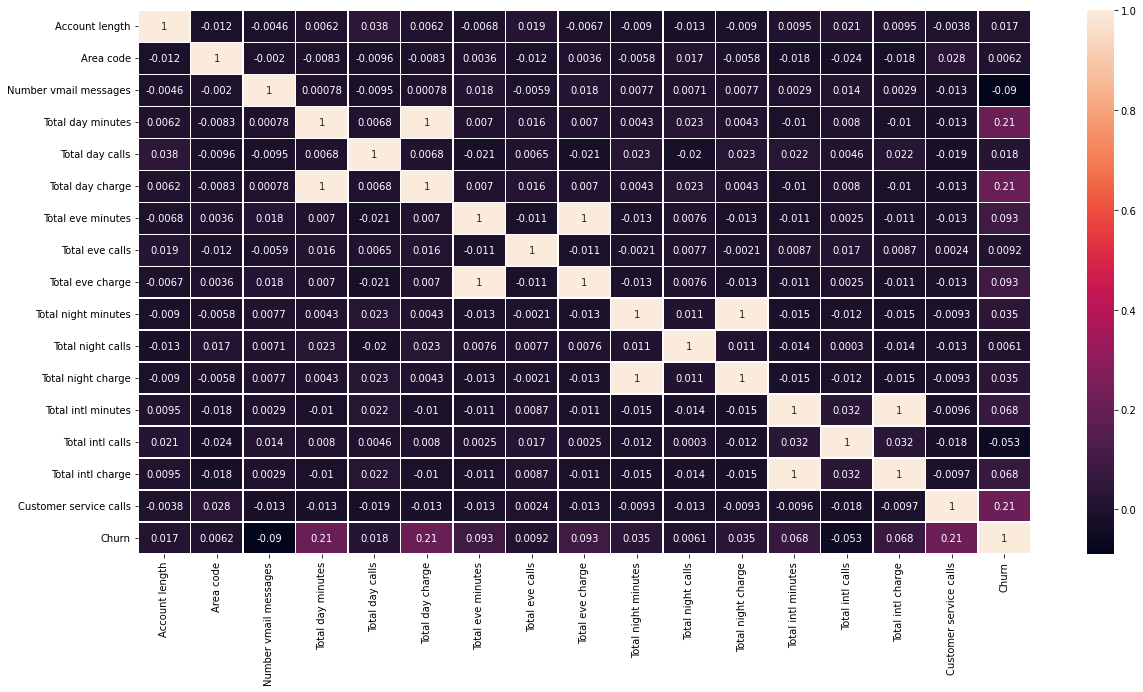

In [ ]:
#heatmap of all columns
df_corr=df.corr()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_corr, linewidths=.5, annot=True);

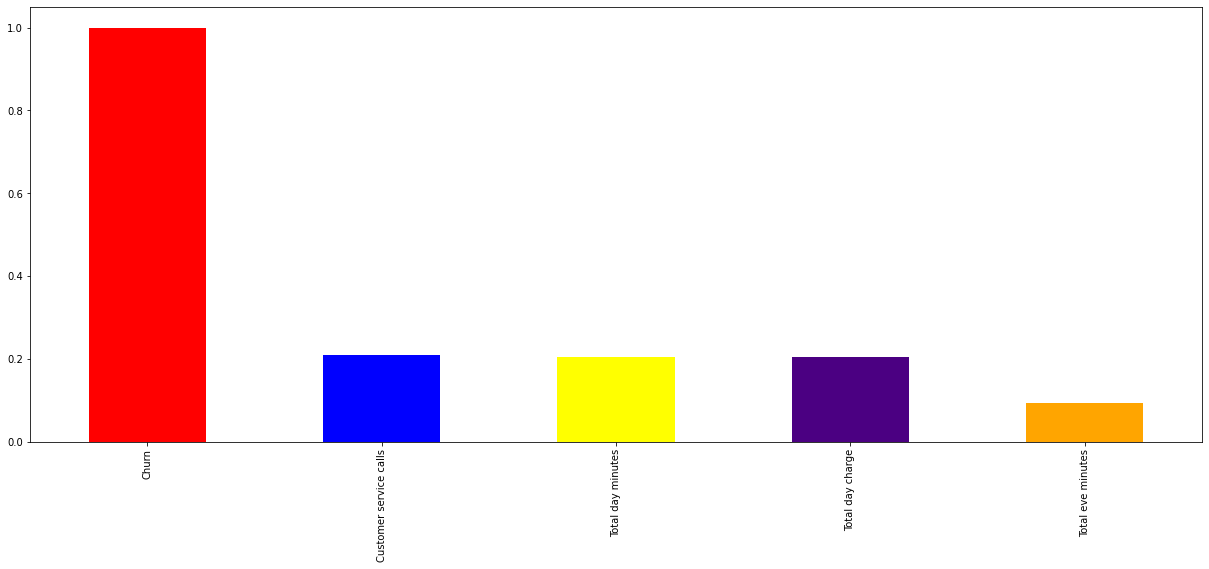

In [ ]:
#graph using correlation plot
plt.figure(figsize=(21,8))
df.corr()['Churn'].sort_values(ascending = False).head(5).plot(kind='bar',color = ['red','blue','yellow','indigo','orange'])

# **Conclusion**

 **Observations:**
* ***14.49% is the Current Churn rate.***
* ***It is clearly visible that the Customers who are associated with us for less than 100 days tend to leave us than that of 100+ days.***
* ***There are some issues with the Services which are needed to be solved On-Time rather than receiving multiple calls at the Customer Service End.***
* ***The Customers having an International plan have way much more Churn Rate than those who don't have one.***
* ***Total Day Charge is a bit more than in comparison to Total evening charge and Total night charge.***
* ***The States that are happy with our Services are HI, AK and AZ.***
* ***The States that need our Attention are NJ, CA and TX.***

 **Recommendations:**

* ***The Customers who are associated with us for less than 100 days need to be provided with some offers.***
* ***The Customer Service Calls should not be Exceeding the limit of 3 Calls.***
* ***The Customers having an International plan should be provided with some additional benefits.***
* ***Total Day Charge should be in a ratio with the Evening and Night Charge.***
* ***The States facing some Major Issues are NJ, CA, and TX  need to be solved as soon as possible.***
